### Python module/package imports for this chapter

In [1]:
import os, sys, collections, re, json, io, base64

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
import requests
import bs4      # BeautifulSoup 4

In [4]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

## Making a Martian roll-through with `matplotlib`

In [5]:
open('locations.xml','r').readlines()[:19]

['<msl>\n',
 '  <location>\n',
 '    <site>00000</site>\n',
 '    <itemName>0000000000</itemName>\n',
 '    <lon>137.4416334989196</lon>\n',
 '    <rot>0.014572, -0.034982, 0.831579, 0.554112</rot>\n',
 '    <endSol>00000</endSol>\n',
 '    <dateAdded>2016-11-21T15:55:00Z</dateAdded>\n',
 '    <startSol>00000</startSol>\n',
 '    <arrivalTime>2012-08-05T13:49:59Z</arrivalTime>\n',
 '    <mapPixelH>82253.03164549096</mapPixelH>\n',
 '    <contributor>Team MSLICE</contributor>\n',
 '    <drive>00000</drive>\n',
 '    <mapPixelV>123500.99039381815</mapPixelV>\n',
 '    <z>0.0</z>\n',
 '    <y>0.0</y>\n',
 '    <lat>-4.5894669521344875</lat>\n',
 '    <x>0.0</x>\n',
 '  </location>\n']

In [6]:
xml = bs4.BeautifulSoup(open('locations.xml','r'),'lxml-xml')

In [7]:
locations = xml.find_all('location')

In [8]:
len(locations)

14247

In [9]:
coords = collections.OrderedDict()

for location in locations:
    coords[location.site.string] = (float(location.lon.string),float(location.lat.string))

In [14]:
coords

OrderedDict([('00000', (137.4416334989196, -4.5894669521344875)),
             ('00001', (137.44163349082447, -4.589466943324896)),
             ('00002', (137.44163348272937, -4.589466934515306)),
             ('00003', (137.44289138782085, -4.590128714785257)),
             ('00004', (137.44835135793426, -4.590019479253231)),
             ('00005', (137.44915564374458, -4.589470392372824)),
             ('00006', (137.44863654627525, -4.590494796380398)),
             ('00007', (137.4470826644446, -4.590716133557534)),
             ('00008', (137.44424993588683, -4.593046696341203)),
             ('00009', (137.44190734237193, -4.594153334118832)),
             ('00010', (137.4398783081202, -4.596309147118519)),
             ('00011', (137.43692098899373, -4.597512781037194)),
             ('00012', (137.43381619917145, -4.5998414715149325)),
             ('00013', (137.43049614566226, -4.600504253037245)),
             ('00014', (137.4280326968518, -4.603861355310208)),
            

In [10]:
lonlat = np.fromiter(coords.values(),dtype=[('lon','d'),('lat','d')])

In [11]:
lonlat

array([(137.4416334989196, -4.5894669521344875),
       (137.44163349082447, -4.589466943324896),
       (137.44163348272937, -4.589466934515306),
       (137.44289138782085, -4.590128714785257),
       (137.44835135793426, -4.590019479253231),
       (137.44915564374458, -4.589470392372824),
       (137.44863654627525, -4.590494796380398),
       (137.4470826644446, -4.590716133557534),
       (137.44424993588683, -4.593046696341203),
       (137.44190734237193, -4.594153334118832),
       (137.4398783081202, -4.596309147118519),
       (137.43692098899373, -4.597512781037194),
       (137.43381619917145, -4.5998414715149325),
       (137.43049614566226, -4.600504253037245),
       (137.4280326968518, -4.603861355310208),
       (137.42627707556719, -4.607062051642259),
       (137.4239145675762, -4.6095271186174935),
       (137.42243351130577, -4.611779936708497),
       (137.42077478514892, -4.615217534095999),
       (137.41944591878394, -4.6180009273710665),
       (137.417169557

/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


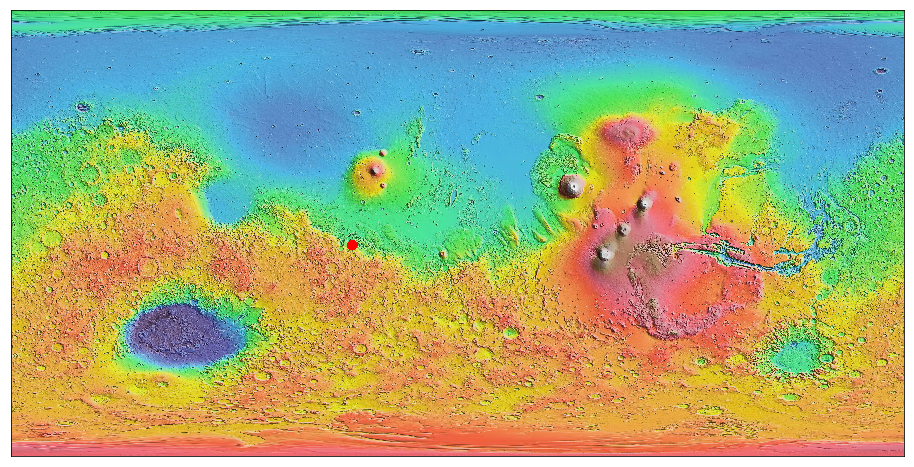

In [12]:
mars = PIL.Image.open('mars_cylindrical.jpg')

pp.figure(figsize=(16,10))

world = Basemap(lon_0 = 180)

world.imshow(mars,origin='upper')
world.plot(lonlat['lon'],lonlat['lat'],'r.',ms=15,latlon=True)

/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


(137.3, 137.5, -4.8, -4.4)

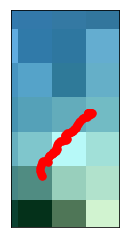

In [13]:
world.imshow(mars,origin='upper')
world.plot(lonlat['lon'],lonlat['lat'],'r.',ms=15,latlon=True)

pp.axis(xmin=137.3,xmax=137.5,ymin=-4.8,ymax=-4.4)

/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


(135.6, 139.9, -7.5, -3.2)

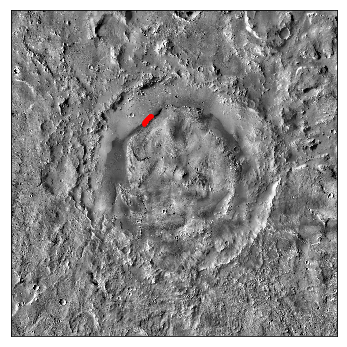

In [14]:
crater = PIL.Image.open('gale_themis_vis_fix_v4_reduced.png')

pp.figure(figsize=(12,6))

pp.imshow(crater,origin='upper',interpolation='none',
          cmap=pp.get_cmap('gray'),
          extent=[135.6,139.9,-7.5,-3.2])
world.plot(lonlat['lon'],lonlat['lat'],'r.',latlon=True)

pp.axis(xmin=135.6,xmax=139.9,ymin=-7.5,ymax=-3.2)

/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nigelnicholson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


(137, 138, -5, -4.5)

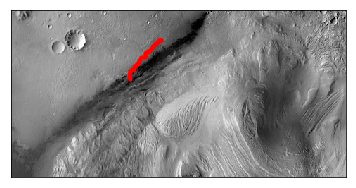

In [15]:
pp.imshow(crater,origin='upper',interpolation='none',
          cmap=pp.get_cmap('gray'),
          extent=[135.6,139.9,-7.5,-3.2])
world.plot(lonlat['lon'],lonlat['lat'],'r.',latlon=True)

pp.axis(xmin=137,xmax=138,ymin=-5,ymax=-4.5)